In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import pandas as pd

diabetes = load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [2]:
df_diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_diabetes['target'] = diabetes.target

In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
df_diabetes.head(n=20)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [6]:
from sklearn.model_selection import train_test_split

X = df_diabetes.loc[:,(df_diabetes.columns != 'target')]
y = df_diabetes['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size=0.33, 
                                                      random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV
clf = LinearRegression()
model = GridSearchCV(estimator=clf, 
                     param_grid={                         
                         'normalize':[True, False],
                     }, 
                     cv=10, #10-Fold CrossValidation
                     n_jobs=2, 
                     scoring='r2')
model.fit(X_train, y_train)
print()
print(model.best_params_)
print('R² %.2f%%' % (model.best_score_*100))


{'normalize': True}
R² 41.77%


In [8]:
import numpy as np
predictions = model.predict(X_valid)
print('R² %.2f%%' % (model.score(X_valid, y_valid)*100))

R² 51.04%


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print('Mean square error: %.2f'
      % mean_squared_error(y_valid, predictions))

# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, predictions))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R²): %.2f%%'
      % (r2_score(y_valid, predictions)*100))

Mean square error: 2817.80
Mean absolute error: 41.96
Coefficient of determination (R²): 51.04%


# Comparando Real e Predito

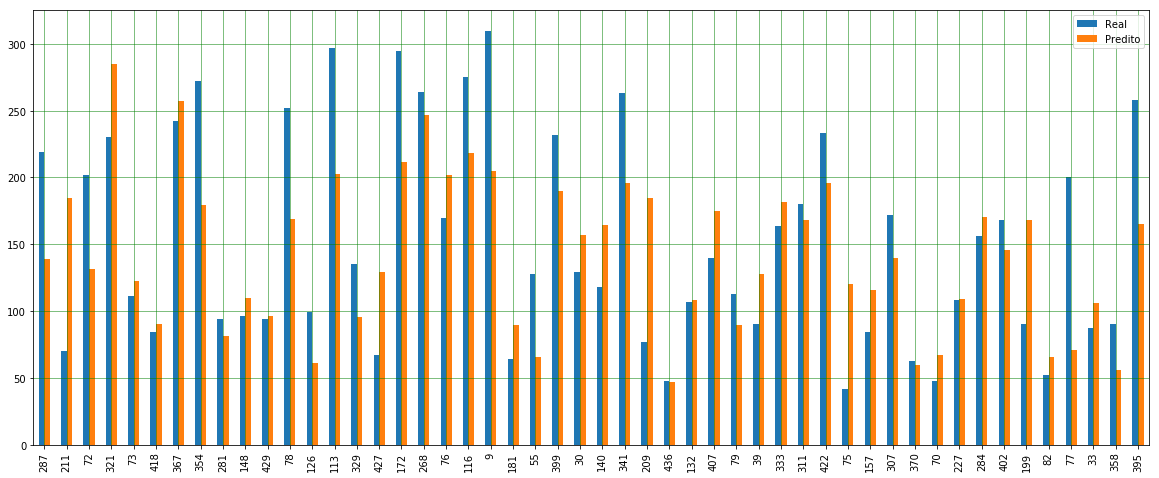

In [10]:
df = pd.DataFrame({'Real': y_valid, 'Predito': predictions}).head(50)
df.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Redução para Visualização

In [11]:
from sklearn.decomposition import PCA
pca_diabetes = PCA(n_components=2)
principalComponents_diabetes = pca_diabetes.fit_transform(X_valid)

In [12]:
principal_diabetes_Df = pd.DataFrame(data = principalComponents_diabetes
             , columns = ['principal component 1', 'principal component 2'])
principal_diabetes_Df['y'] = y_valid
principal_diabetes_Df['predicts'] = predictions

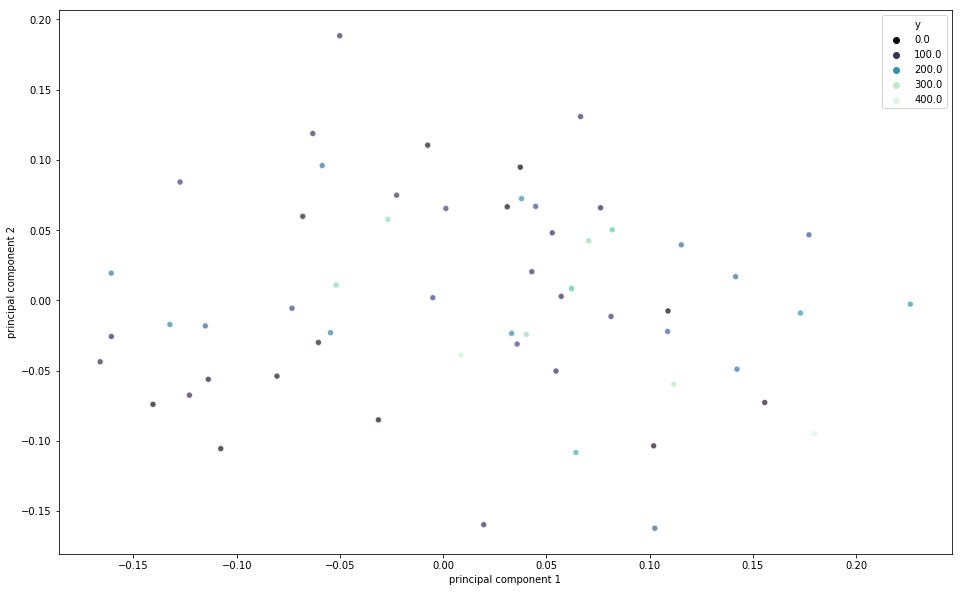

In [13]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",    
    data=principal_diabetes_Df,    
    alpha=0.7,
    palette="mako"
)

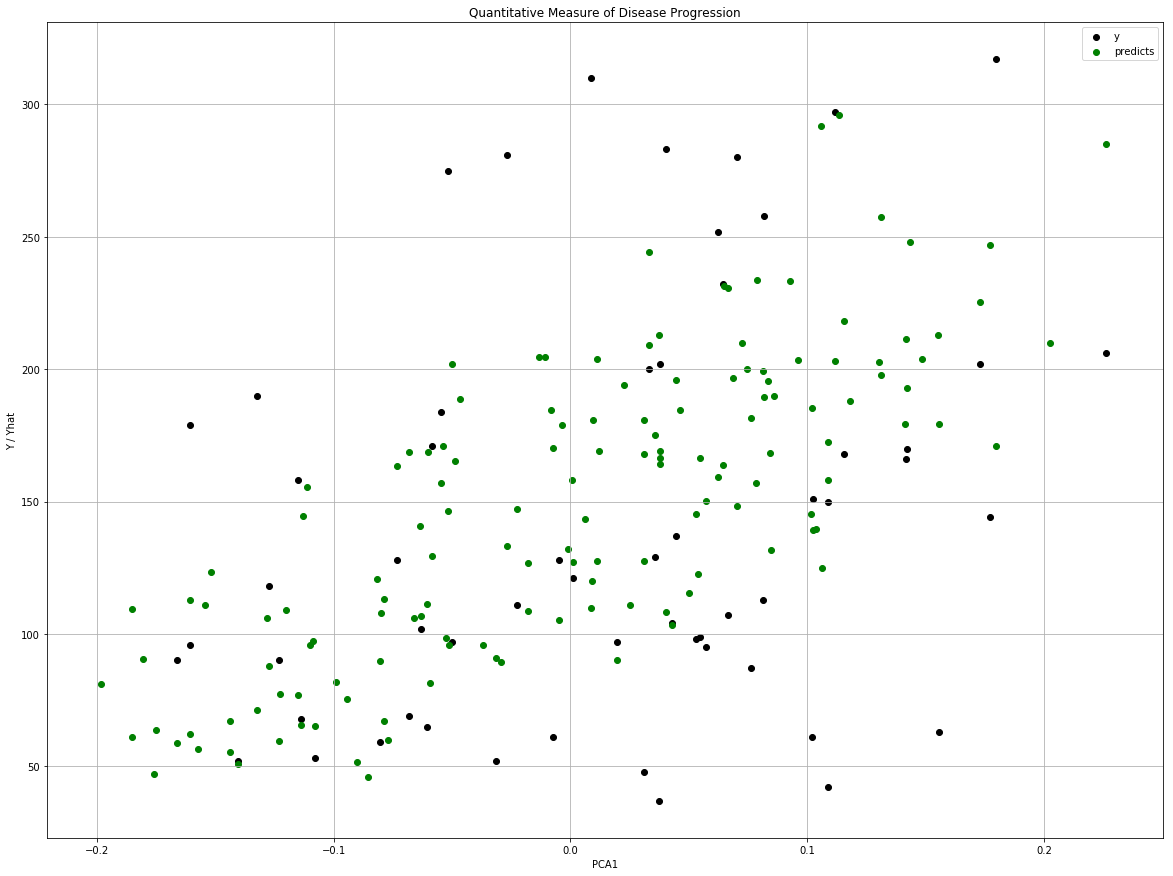

In [14]:
# Plot outputs
plt.figure(figsize=(20,15))
plt.scatter(x="principal component 1", y="y",  color="black", data=principal_diabetes_Df)
plt.scatter(x="principal component 1", y="predicts", color="green", data=principal_diabetes_Df)

#plt.xticks(())
#plt.yticks(())

plt.title("Quantitative Measure of Disease Progression")
plt.xlabel('PCA1')
plt.ylabel('Y / Yhat')

plt.legend()
plt.grid()

plt.show()

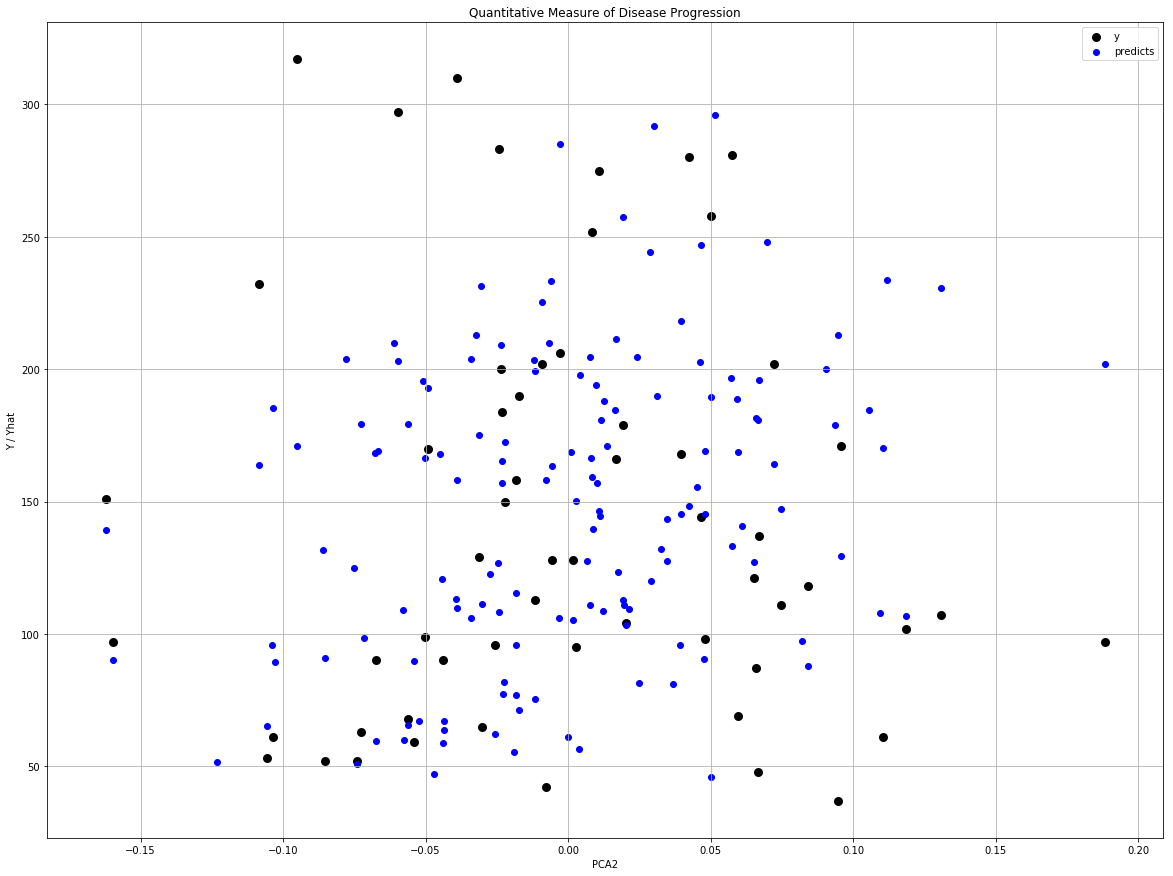

In [15]:
# Plot outputs
plt.figure(figsize=(20,15))
plt.scatter(x="principal component 2", y="y",  color='black', linewidths=3, data=principal_diabetes_Df)
plt.scatter(x="principal component 2", y="predicts", color='blue', data=principal_diabetes_Df)

#plt.xticks(())
#plt.yticks(())

plt.title("Quantitative Measure of Disease Progression")
plt.xlabel('PCA2')
plt.ylabel('Y / Yhat')

plt.legend()
plt.grid()

plt.show()